# Imports and prerequisites

In [1]:
# !pip install yfinance --upgrade --no-cache-dir -q

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import yfinance as yf
from pathlib import Path

# Downloading data

In [3]:
company_list = [
    # Technology
    'AAPL',  # Apple Inc.
    'MSFT',  # Microsoft Corporation
    'NVDA',  # NVIDIA Corporation
    'GOOGL', # Alphabet Inc. (Google)
    'INTC',  # Intel Corporation
    '005930.KS',  # Samsung Electronics (Korea Stock Exchange)
    'ADBE',  # Adobe Inc.
    'CRM',   # Salesforce, Inc.
    'ORCL',  # Oracle Corporation
    'TXN',   # Texas Instruments Incorporated

    # Health Care
    'JNJ',   # Johnson & Johnson
    'UNH',   # UnitedHealth Group Incorporated
    'PFE',   # Pfizer Inc.
    'RHHBY', # Roche Holding AG
    'MRK',   # Merck & Co., Inc.
    'ABBV',  # AbbVie Inc.
    'AMGN',  # Amgen Inc.
    'MDT',   # Medtronic plc
    'AZN',   # AstraZeneca plc
    'GILD',  # Gilead Sciences, Inc.

    # Financials
    'JPM',   # JPMorgan Chase & Co.
    'BAC',   # Bank of America Corporation
    'WFC',   # Wells Fargo & Company
    'BRK-B', # Berkshire Hathaway Inc.
    'GS',    # Goldman Sachs Group, Inc.
    'C',     # Citigroup Inc.
    'MS',    # Morgan Stanley
    'AXP',   # American Express Company
    'V',     # Visa Inc.
    'MA',    # Mastercard Incorporated

    # Consumer Discretionary
    'AMZN',  # Amazon.com, Inc.
    'TSLA',  # Tesla, Inc.
    'HD',    # Home Depot, Inc.
    'NKE',   # Nike, Inc.
    'MCD',   # McDonald's Corporation
    'LOW',   # Lowe's Companies, Inc.
    'BKNG',  # Booking Holdings Inc.
    'SBUX',  # Starbucks Corporation
    'GM',    # General Motors Company
    'DIS',   # Walt Disney Company

    # Consumer Staples
    'PG',    # Procter & Gamble Co.
    'KO',    # Coca-Cola Company
    'PEP',   # PepsiCo, Inc.
    'UL',    # Unilever PLC
    'WMT',   # Walmart Inc.
    'NSRGY', # Nestlé S.A.
    'CL',    # Colgate-Palmolive Company
    'MDLZ',  # Mondelez International, Inc.
    'PM',    # Philip Morris International Inc.
    'KMB',   # Kimberly-Clark Corporation

    # Energy
    'XOM',   # Exxon Mobil Corporation
    'CVX',   # Chevron Corporation
    'TTE',   # TotalEnergies SE
    'SHEL',  # Shell plc
    'BP',    # BP p.l.c.
    'COP',   # ConocoPhillips
    'NEE',   # NextEra Energy, Inc.
    'E',     # Eni S.p.A.
    'SLB',   # Schlumberger Limited
    'EQNR',  # Equinor ASA

    # Materials
    'BHP',   # BHP Group
    'RIO',   # Rio Tinto Group
    'DD',    # DuPont de Nemours, Inc.
    'LIN',   # Linde plc
    'BASFY', # BASF SE
    'FCX',   # Freeport-McMoRan Inc.
    'NEM',   # Newmont Corporation
    'GOLD',  # Barrick Gold Corporation
    'SHW',   # Sherwin-Williams Company
    'VALE',  # Vale S.A.

    # Industrials
    'BA',    # Boeing Company
    'HON',   # Honeywell International Inc.
    'CAT',   # Caterpillar Inc.
    'LMT',   # Lockheed Martin Corporation
    'MMM',   # 3M Company
    'GE',    # General Electric Company
    'NOC',   # Northrop Grumman Corporation
    'RTX',   # Raytheon Technologies Corporation
    'SIEGY', # Siemens AG
    'UPS',   # United Parcel Service, Inc.

    # Real Estate
    'PLD',   # Prologis, Inc.
    'AMT',   # American Tower Corporation
    'CCI',   # Crown Castle International Corp.
    'SPG',   # Simon Property Group, Inc.
    'EQR',   # Equity Residential
    'PSA',   # Public Storage
    'AVB',   # AvalonBay Communities, Inc.
    'WELL',  # Welltower Inc.
    'DLR',   # Digital Realty Trust, Inc.
    'VNO',   # Vornado Realty Trust

    # Communication Services
    'META',  # Meta Platforms, Inc. (Facebook)
    'NFLX',  # Netflix, Inc.
    'DIS',   # Walt Disney Company
    'CMCSA', # Comcast Corporation
    'VZ',    # Verizon Communications Inc.
    'T',     # AT&T Inc.
    'TMUS',  # T-Mobile US, Inc.
    'CHTR',  # Charter Communications, Inc.
    'BKNG',  # Booking Holdings Inc.
    'SONY',  # Sony Group Corporation
]


def download_historical_data(company_names=company_list):
    for company in company_names:
        try:
            # Fetch historical data for the company
            stock_data = yf.download(company, period="max")

            # Save the data to a CSV file
            stock_data.to_csv(f"./company_data/{company}_stock_data.csv")
            print(f"SUCCESS: {company}")
        except Exception as e:
            print(f"Could not download data for {company}: {e}")

"""
download_historical_data()
"""

'\ndownload_historical_data()\n'

# Optimizing the data

### Removing unneed data

**NOTE: This cell is commented out to prevent an accidental re-run**

Before running the code below, the total size of the folder was 113 MB. After processing, it has been reduced to just 17 MB, resulting in an impressive space savings of 84.96%.

In [4]:
directory_path = Path('./company_data')
file_names = []

# Get the names of all the files
for file in directory_path.iterdir():
    if file.is_file():
        file_names.append(f'./company_data/{file.name}')

In [5]:
"""
ABOUT THE RAW CSV DATA SAMPLE.
For some reason, yahoo decided it was a good idea to have 3 header rows, so now
we have to strip away the first 2 rows (that way we can extract the date column)
and rename the columns to what they should be.

Below is a sample of the raw CSV data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
1980-12-12 00:00:00+00:00,0.09894319623708725,0.1283479928970337,0.1289059966802597,0.1283479928970337,0.1283479928970337,469033600
1980-12-15 00:00:00+00:00,0.0937812551856041,0.12165199965238571,0.12221000343561172,0.12165199965238571,0.12221000343561172,175884800

""";


count = 0
def optimize_yahoo_data(file_path):
    global count
    with open(file_path, 'r') as file:
        df = pd.read_csv(file, skiprows=2)
        
        # Rename the columns (thanks yahoo), then convert to datetime so we can remove the unneed time portion.
        df.columns = ['date', 'adj close', 'close', 'high', 'low', 'open', 'volume']
        df['date'] = pd.to_datetime(df['date'])
        df['date'] = df['date'].dt.date
        # Round the adj close column
        df['adj close'] = df['adj close'].round(3)
        
        # Only keep the needed columns
        df = df[['date', 'adj close']]
    
        #keep tally of number of rows for the research paper
        count += df.shape[0]
        
        # Write the modified DataFrame back to the same CSV file
        df.to_csv(file_path, index=False)

"""
for file in file_names:
    optimize_yahoo_data(file)
""";

### Averaging out stock prices for the entire month

**NOTE: This cell is commented out to prevent an accidental re-run**

After optimizing the data twice now, the size has been reduced to just a microscopic 675.8 Kb, bumping up out total space saving to 99.4%. <br>
For reference, the size of the smallest file before optimization was 355 Kb, now the largest file is 11 Kb.

In [6]:
def average_cost_by_month(file_path):
    with open(file_path, 'r') as file:
        df = pd.read_csv(file)

        # Convert to date to datetime (... again)
        df['date'] = pd.to_datetime(df['date'])
        
        # Group by date and calculate the sum and count
        monthly_avg = df.groupby(df['date'].dt.to_period('M'))['adj close'].agg(['sum', 'count'])
        
        # Calculate the average and round
        monthly_avg['average'] = (monthly_avg['sum'] / monthly_avg['count']).round(3)
        
        # Keep only the relevant columns
        df = monthly_avg[['average']].reset_index()

        # Write the modified DataFrame back to the same CSV file
        df.to_csv(file_path, index=False)

"""
for file in file_names:
    average_cost_by_month(file)
""";

# Formatting

Currently the individual company's data does not have any identifiable info exept the file name itself.<br>
We will be adding two new columns: ticker and industry. These will be usefull for later when combining the data.

In [7]:
def format_file(file_path):
    with open(file_path, 'r') as file:
        df = pd.read_csv(file)
        ticker = file_path.split('/')[-1].split('_')[0]

        if ticker in company_list[:10]:
            industry = 'Tech'
        elif ticker in company_list[10:20]:
            industry = 'Health'
        elif ticker in company_list[20:30]:
            industry = 'Financial'
        elif ticker in company_list[30:40]:
            industry = 'Consumer Discretionary'
        elif ticker in company_list[40:50]:
            industry = 'Consumer Staples'
        elif ticker in company_list[50:60]:
            industry = 'Energy'
        elif ticker in company_list[60:70]:
            industry = 'Materials'
        elif ticker in company_list[70:80]:
            industry = 'Industrials'
        elif ticker in company_list[80:90]:
            industry = 'Real Estate'
        elif ticker in company_list[90:100]:
            industry = 'Communication Services'
        
        df['ticker'] = ticker
        df['industry'] = industry

        df.to_csv(file_path, index=False)
        
"""
for file in file_names:
    format_file(file)
""";

# Combining all the dataframes

### Combining the industries together

In [8]:
# COMMENTED OUT TO PREVENT ACCIDENTAL RERUN

"""
consumer_discretionary_df = pd.DataFrame()
tech_df = pd.DataFrame()
materials_df = pd.DataFrame()
energy_df = pd.DataFrame()
financial_df = pd.DataFrame()
consumer_staples_df = pd.DataFrame()
industrials_df = pd.DataFrame()
health_df = pd.DataFrame()
real_estate_df = pd.DataFrame()
communication_services_df = pd.DataFrame()


for file_name in file_names:
    with open(file_name, 'r') as file:
        current_df = pd.read_csv(file)

    ind_name = current_df['industry'].iloc[0]
    
    if ind_name == 'Consumer Discretionary':
        consumer_discretionary_df = pd.concat([consumer_discretionary_df, current_df])
    elif ind_name == 'Tech':
        tech_df = pd.concat([tech_df, current_df])
    elif ind_name == 'Materials':
        materials_df = pd.concat([materials_df, current_df])
    elif ind_name == 'Energy':
        energy_df = pd.concat([energy_df, current_df])
    elif ind_name == 'Financial':
        financial_df = pd.concat([financial_df, current_df])
    elif ind_name == 'Consumer Staples':
        consumer_staples_df = pd.concat([consumer_staples_df, current_df])
    elif ind_name == 'Industrials':
        industrials_df = pd.concat([industrials_df, current_df])
    elif ind_name == 'Health':
        health_df = pd.concat([health_df, current_df])
    elif ind_name == 'Real Estate':
        real_estate_df = pd.concat([real_estate_df, current_df])
    elif ind_name == 'Communication Services':
        communication_services_df = pd.concat([communication_services_df, current_df])
""";

In [9]:
# COMMENTED OUT TO PREVENT ACCIDENTAL RERUN
"""
consumer_discretionary_df.to_csv('./company_data/combined_data/consumer_discretionary_df.csv', index=False)
tech_df.to_csv('./company_data/combined_data/tech_df.csv', index=False)
materials_df.to_csv('./company_data/combined_data/materials_df.csv', index=False)
energy_df.to_csv('./company_data/combined_data/energy_df.csv', index=False)
financial_df.to_csv('./company_data/combined_data/financial_df.csv', index=False)
consumer_staples_df.to_csv('./company_data/combined_data/consumer_staples_df.csv', index=False)
industrials_df.to_csv('./company_data/combined_data/industrials_df.csv', index=False)
health_df.to_csv('./company_data/combined_data/health_df.csv', index=False)
real_estate_df.to_csv('./company_data/combined_data/real_estate_df.csv', index=False)
communication_services_df.to_csv('./company_data/combined_data/communication_services_df.csv', index=False)
""";

### Combining *all* the data together into one

In [10]:
directory_path = Path('./company_data/combined_data')
ind_file_names = []

for file in directory_path.iterdir():
    if file.is_file():
        ind_file_names.append(f'./company_data/combined_data/{file.name}')


mega_df = pd.DataFrame()

for file_name in ind_file_names:
    with open(file_name, 'r') as file:
        df = pd.read_csv(file)
        
    mega_df = pd.concat([mega_df, df])

mega_df.to_csv('./company_data/combined_data/mega_df.csv', index=False)

### Optimizing the mega df

memory usage before optimization: 1.4+ MB <br>
memory usage AFTER optimization: 815.5+ KB

**This give us a 41.7% space savings**

In [11]:
mega_df = pd.read_csv('./company_data/combined_data/mega_df.csv')


mega_df['ticker'] = mega_df['ticker'].astype('category')
mega_df['industry'] = mega_df['industry'].astype('category')

#mega_df.info()

# Plotting the data

## Plotting all the companies

In [12]:
# Convert the dates into a format matplotlib can read
mega_df['formated_date'] = matplotlib.dates.datestr2num(mega_df['date'])

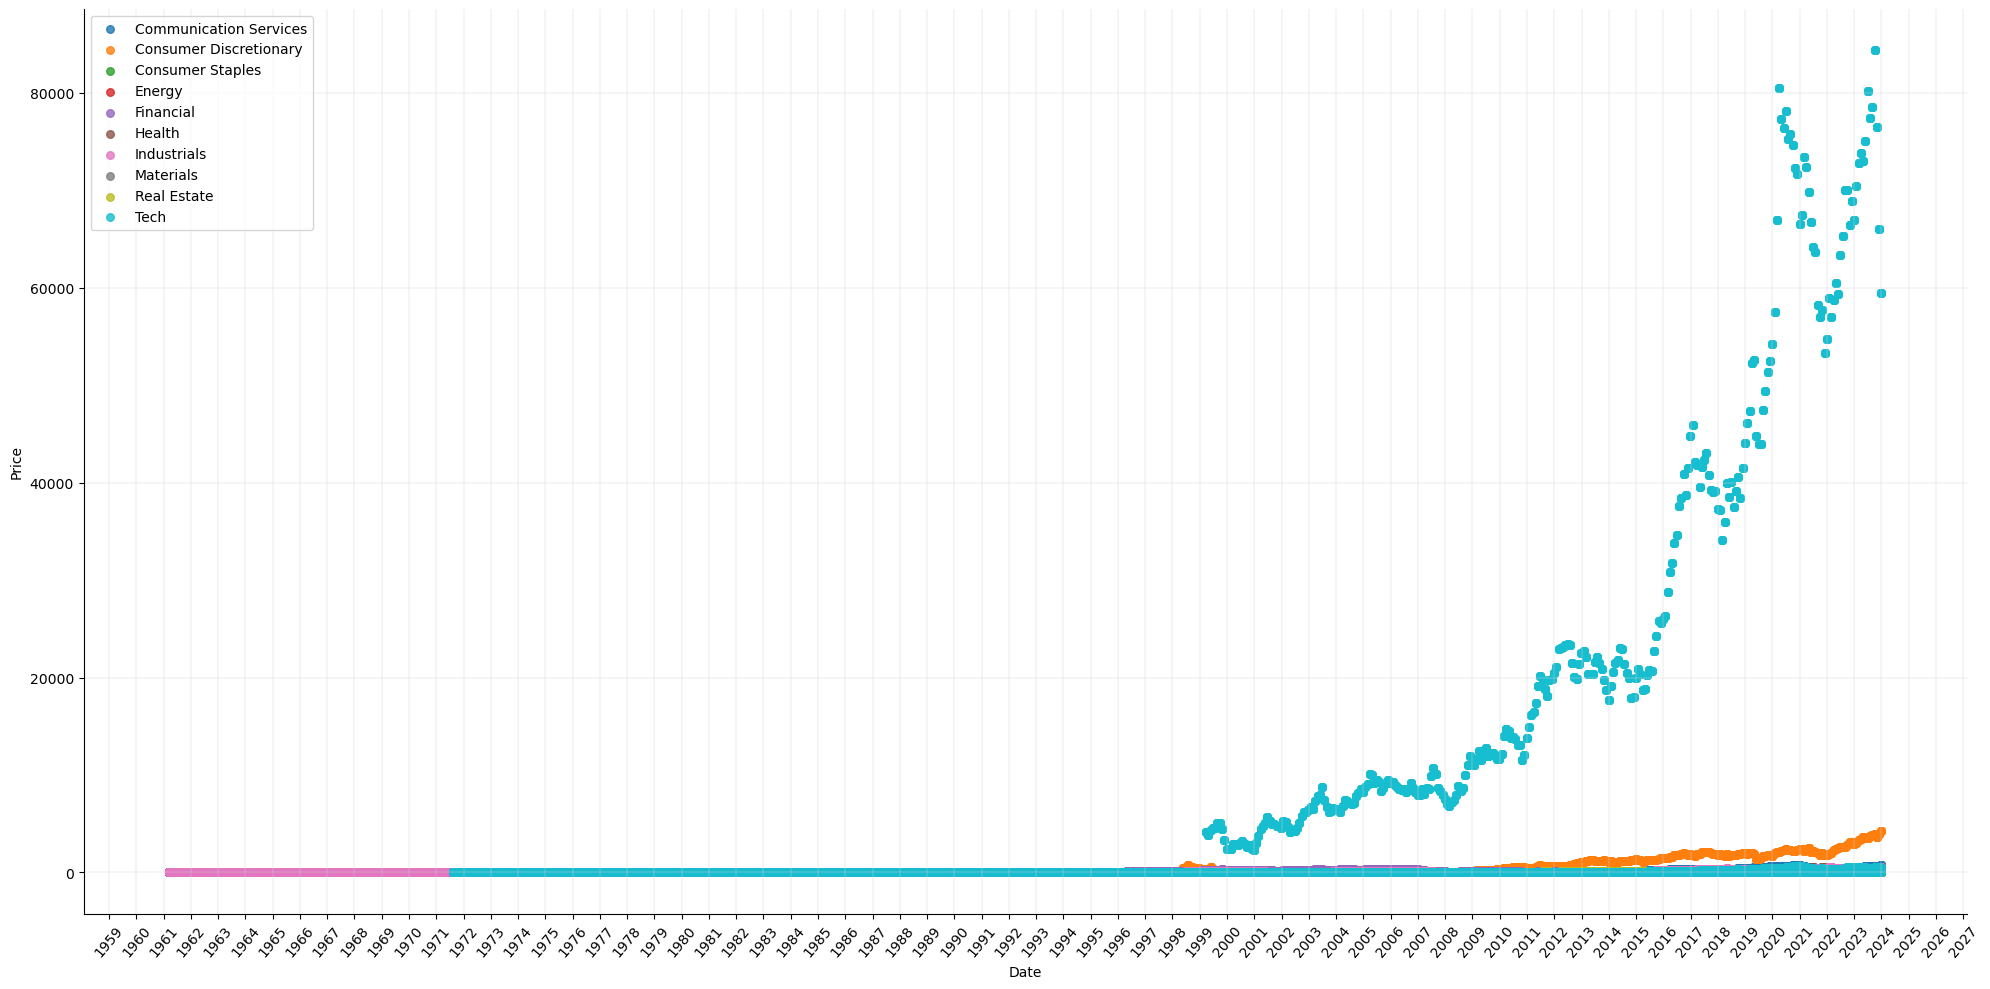

In [13]:
visualization = sns.lmplot(data=mega_df, x='formated_date', y='average',
                           height=10, aspect=2,
                           fit_reg=False, hue='industry',
                           legend=False, scatter_kws={'s':30})

# Format the x-axis to display dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365)) 

plt.xticks(rotation=50)
plt.tight_layout()
plt.legend(loc='upper left')

plt.xlabel('Date')
plt.ylabel('Price')

plt.grid(color='lightgray', linewidth=0.3)

#plt.savefig('./imgs/total/0__all_companies_data_plot.png', format='jpg', dpi=300)

plt.show()

### Droping Samsung Electronics Co Ltd

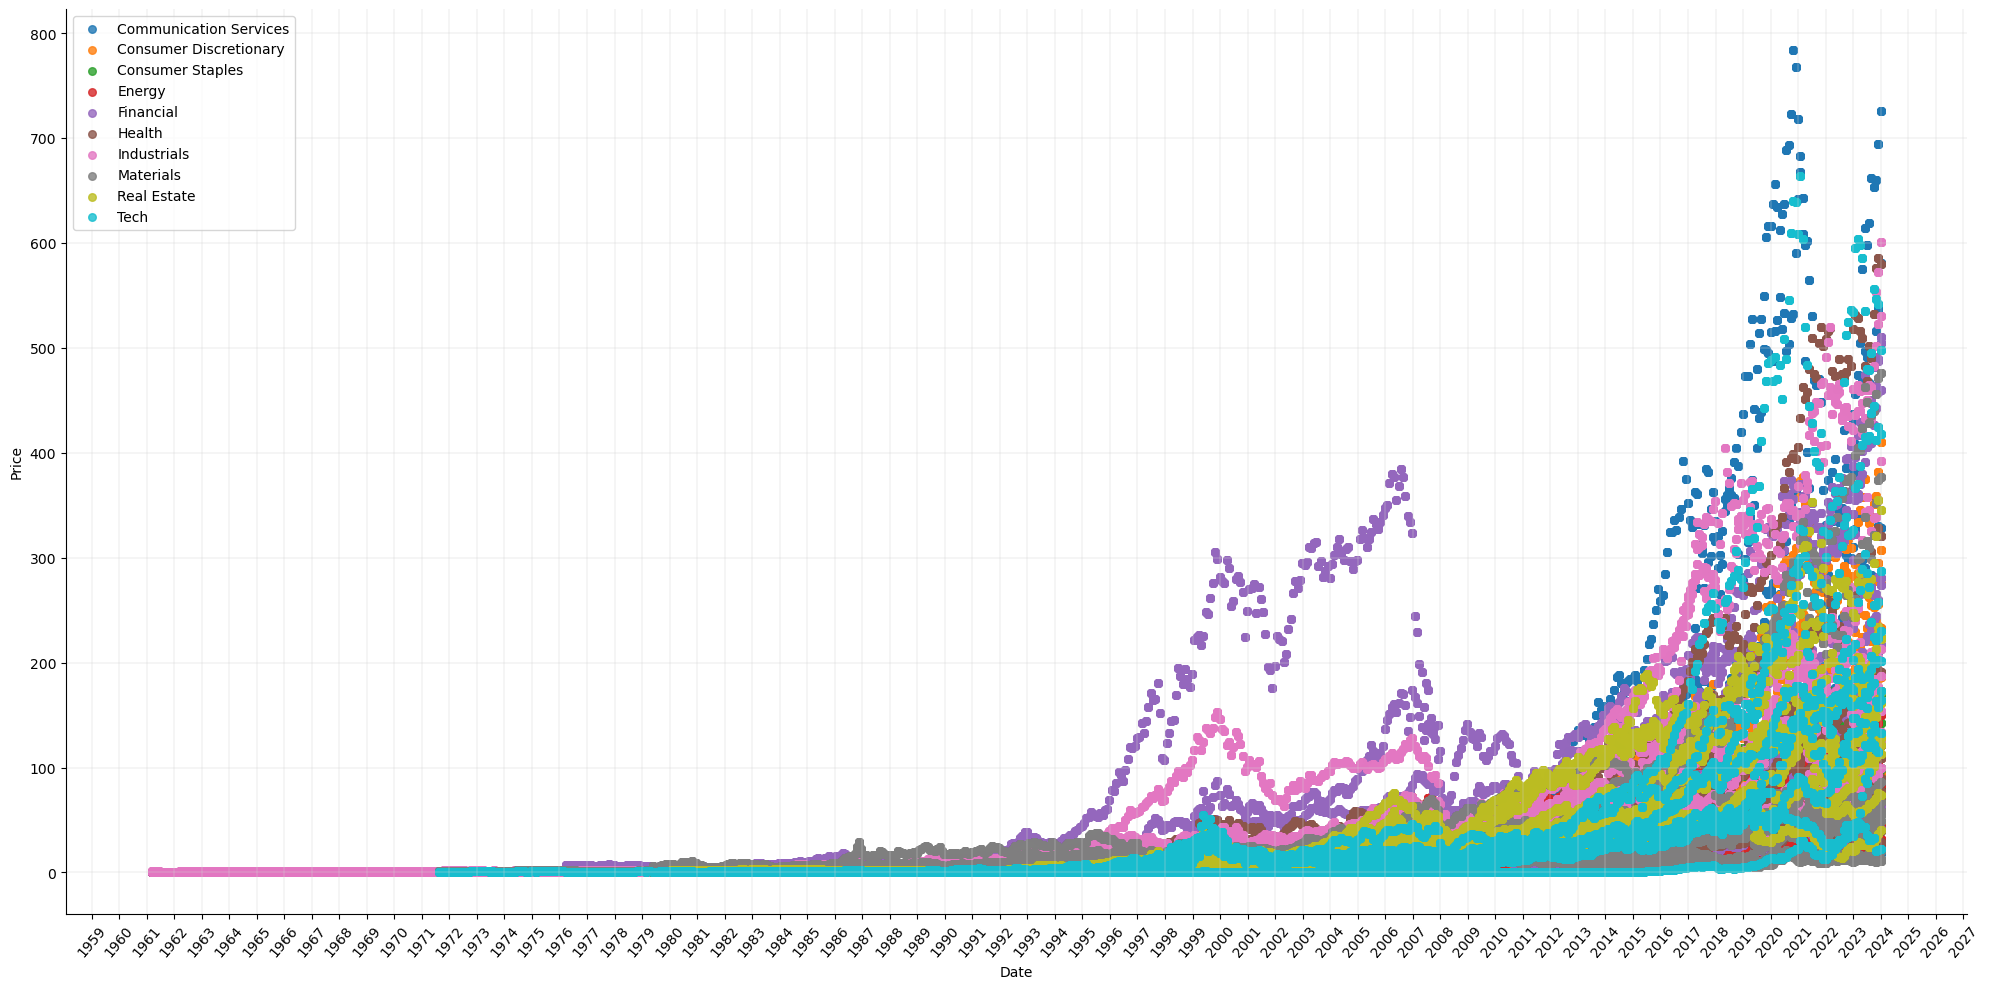

In [14]:
# drop Samsung Electronics Co Ltd and Booking Holdings Inc
mega_df = mega_df.loc[ ~mega_df['ticker'].isin(["005930.KS", "BKNG"]) ]


visualization = sns.lmplot(data=mega_df, x='formated_date', y='average',
                           height=10, aspect=2,
                           fit_reg=False, hue='industry',
                           legend=False, scatter_kws={'s':30})

# Format the x-axis to display dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))

plt.xticks(rotation=50)
plt.tight_layout()
plt.legend(loc='upper left')

plt.xlabel('Date')
plt.ylabel('Price')

plt.grid(color='lightgray', linewidth=0.3)

plt.savefig('./imgs/total/1__drop_top_3_companies_data_plot.png', format='jpg', dpi=300)

plt.show()

## Plotting by industry

In [15]:
# group all the companies by date then average the stock price and export them by industry

"""
for ind in ind_file_names:
    if ind != './company_data/combined_data/mega_df.csv':
        with open(ind, 'r') as file:
            df = pd.read_csv(file)
        
        df = df.groupby(by=['date'])['average'].mean().round(3).reset_index()
        
        ind_label = '_'.join(ind.split('/')[-1].split('_')[:-1])
        df['industry'] = ind_label.title()
    
        file_path = '/'.join( ind.split('/')[:-1] ) + '/avg_by_date'
        df.to_csv(f'{file_path}/{ind_label}.csv', index=False)
""";

In [16]:
# Create another mega_df

directory_path = Path('./company_data/combined_data/avg_by_date')
mean_ind_file_names = []

for file in directory_path.iterdir():
    if file.is_file():
        mean_ind_file_names.append(f'./company_data/combined_data/avg_by_date/{file.name}')
"""
mean_mega_df = pd.DataFrame()

for file_name in mean_ind_file_names:
    with open(file_name, 'r') as file:
        df = pd.read_csv(file)
        
    mean_mega_df = pd.concat([mean_mega_df, df])

mean_mega_df.to_csv('./company_data/combined_data/avg_by_date/mean_mega_df.csv', index=False)
""";

In [17]:
mean_mega_df = pd.read_csv('./company_data/combined_data/avg_by_date/mean_mega_df.csv')

# Convert the dates into a format matplotlib can read
mean_mega_df['formated_date'] = matplotlib.dates.datestr2num(mean_mega_df['date'])

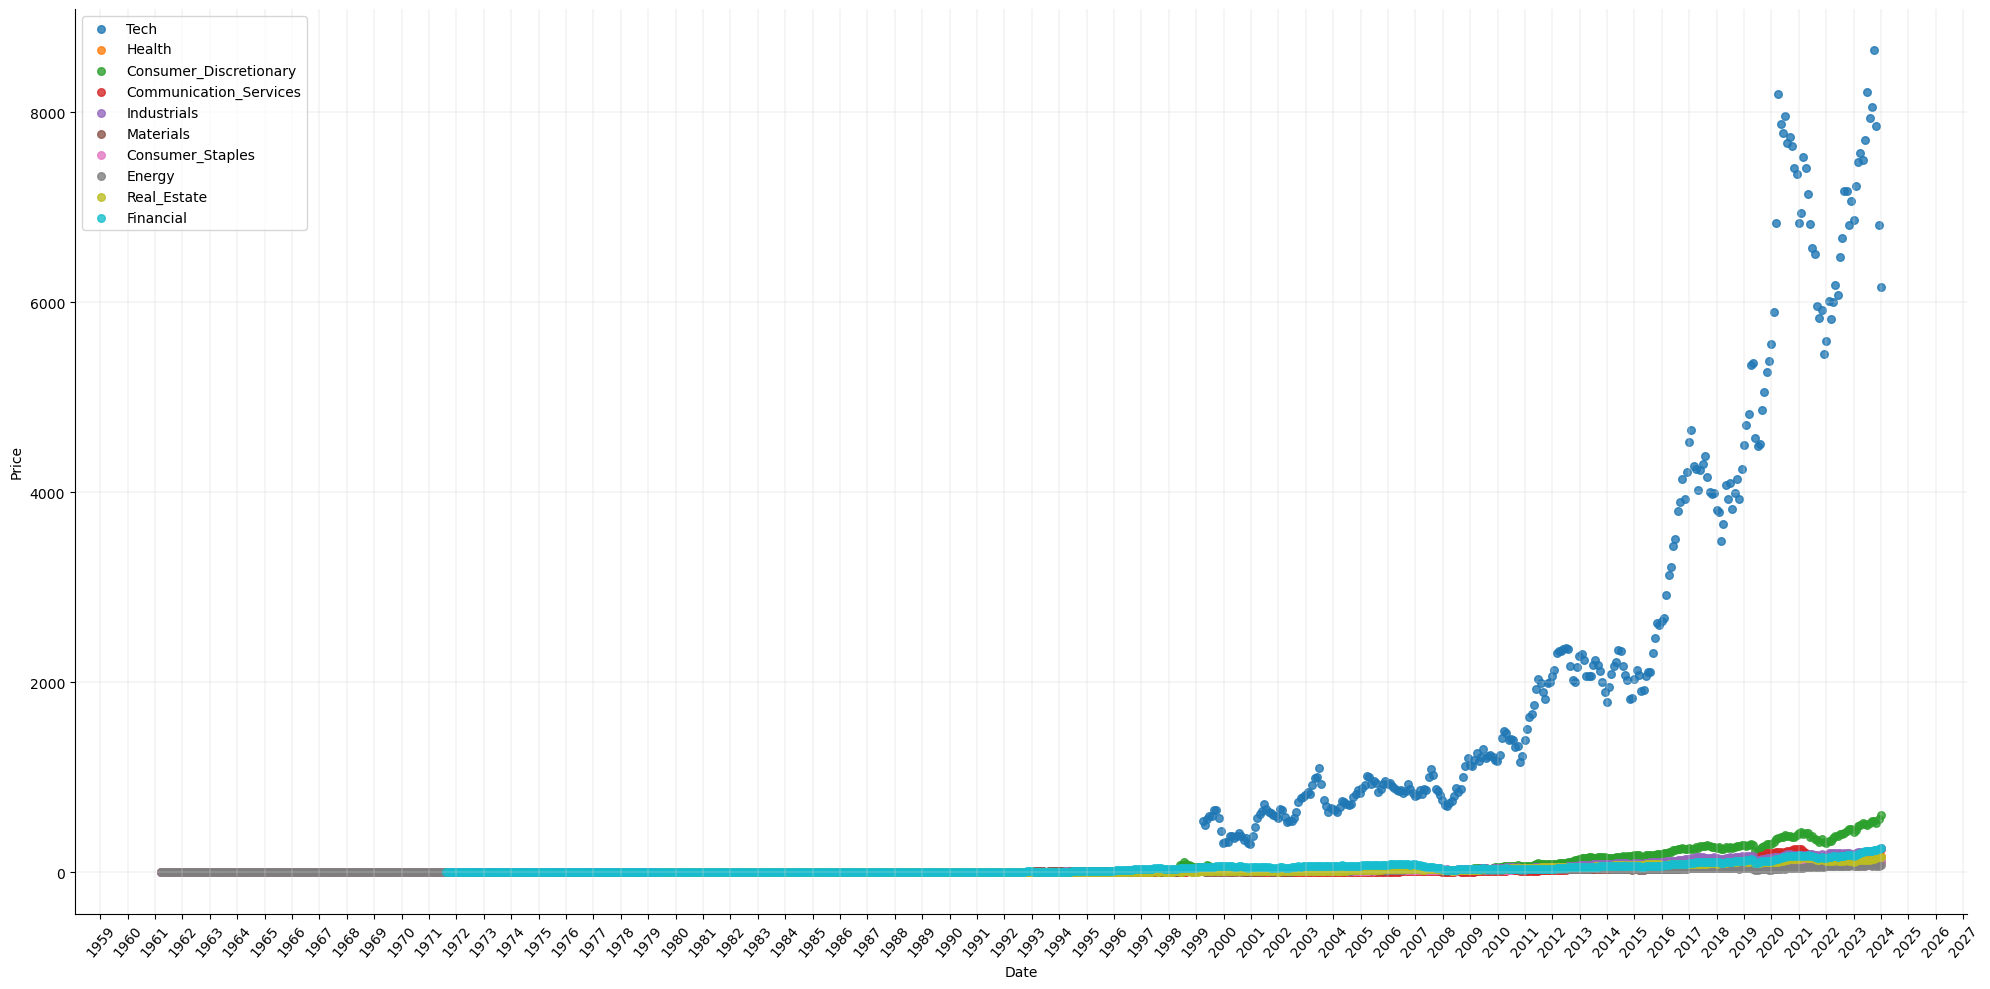

In [18]:
visualization = sns.lmplot(data=mean_mega_df, x='formated_date', y='average',
                           height=10, aspect=2,
                           fit_reg=False, hue='industry',
                           legend=False, scatter_kws={'s':30})

# Format the x-axis to display dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))

plt.xticks(rotation=50)
plt.tight_layout()
plt.legend(loc='upper left')

plt.xlabel('Date')
plt.ylabel('Price')

plt.grid(color='lightgray', linewidth=0.3)

#plt.savefig('./imgs/total/2__mean_mega_df_plot.png', format='jpg', dpi=300)

plt.show()

### Drop the tech industry

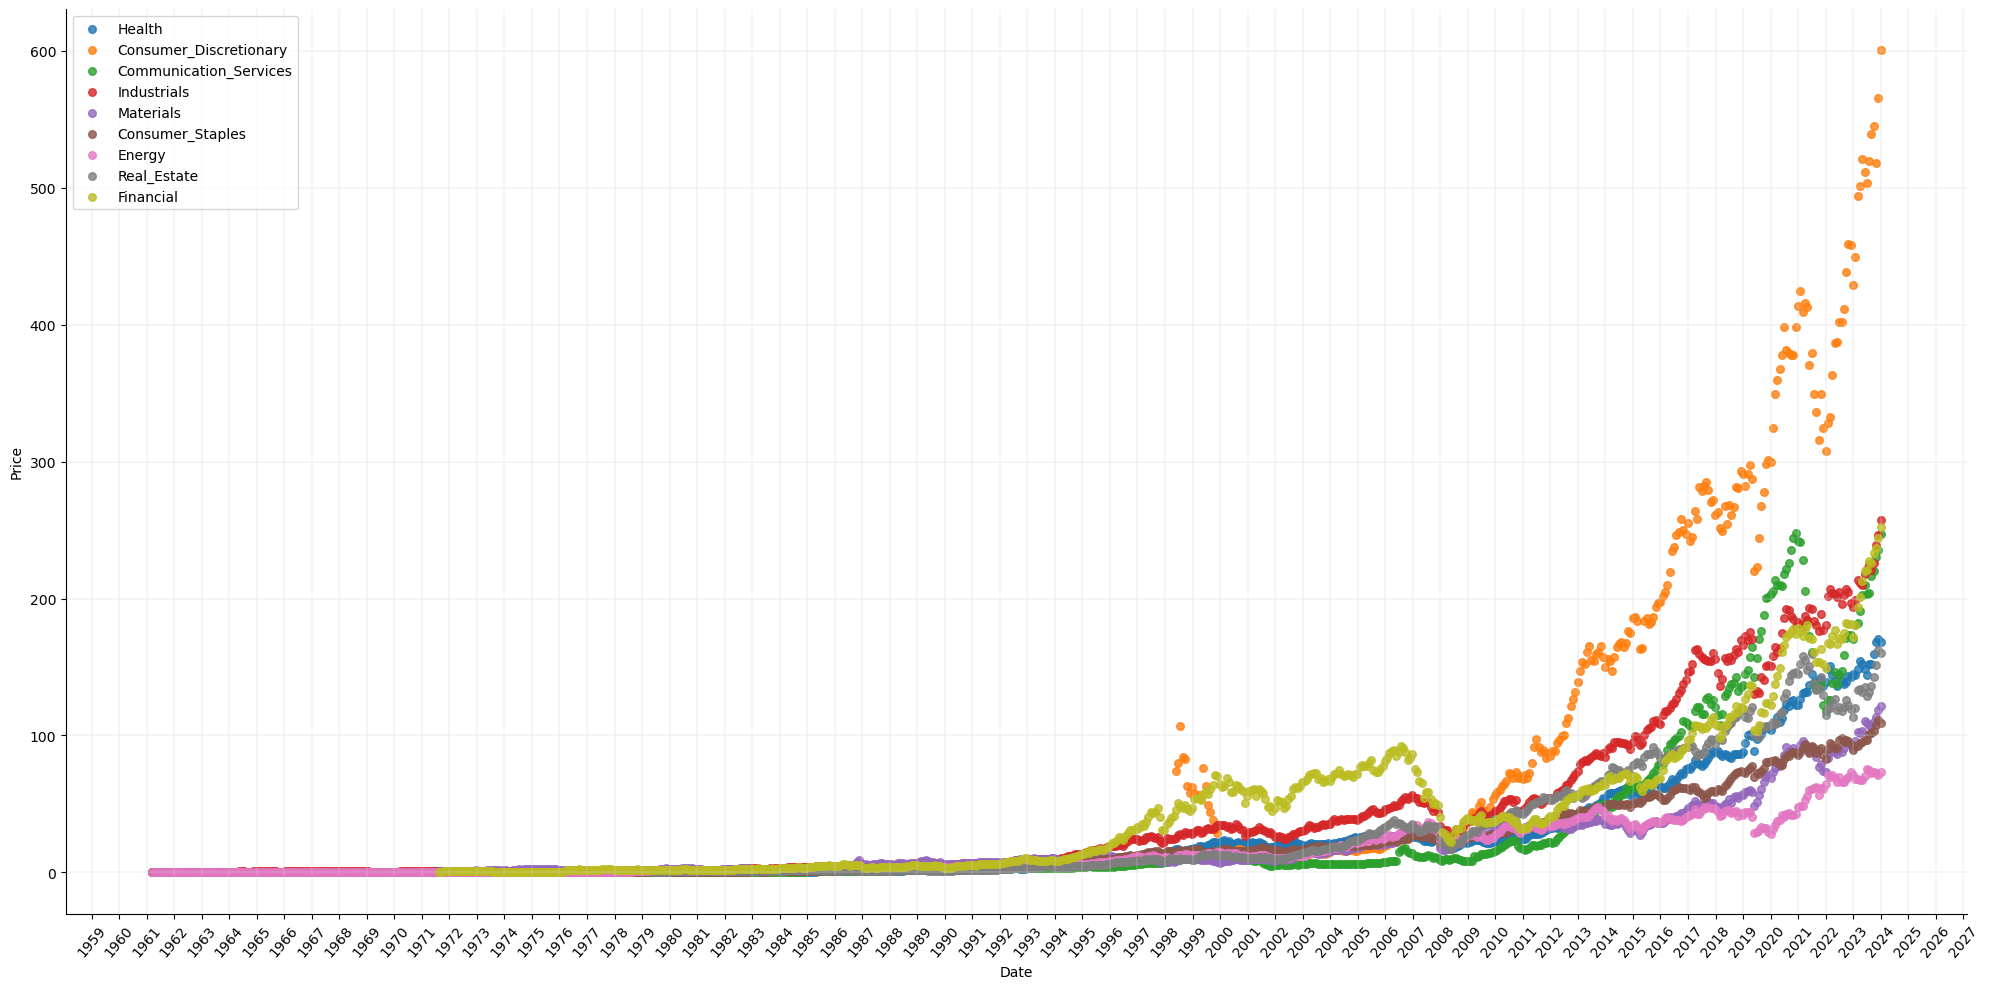

In [19]:
mean_mega_df = mean_mega_df.loc[ mean_mega_df['industry'] != 'Tech' ]


visualization = sns.lmplot(data=mean_mega_df, x='formated_date', y='average',
                           height=10, aspect=2,
                           fit_reg=False, hue='industry',
                           legend=False, scatter_kws={'s':30})

# Format the x-axis to display dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))

plt.xticks(rotation=50)
plt.tight_layout()
plt.legend(loc='upper left')

plt.xlabel('Date')
plt.ylabel('Price')

plt.grid(color='lightgray', linewidth=0.3)

#plt.savefig('./imgs/total/3__mean_mega_df_tech_removed_plot.png', format='jpg', dpi=300)

plt.show()

# Plotting data after 1995

### All data

In [20]:
mega_df = pd.read_csv('./company_data/combined_data/mega_df.csv')

mega_df = mega_df.loc[ mega_df['date'] >= '1995-01' ]


# Convert the dates into a format matplotlib can read
mega_df['formated_date'] = matplotlib.dates.datestr2num(mega_df['date'])


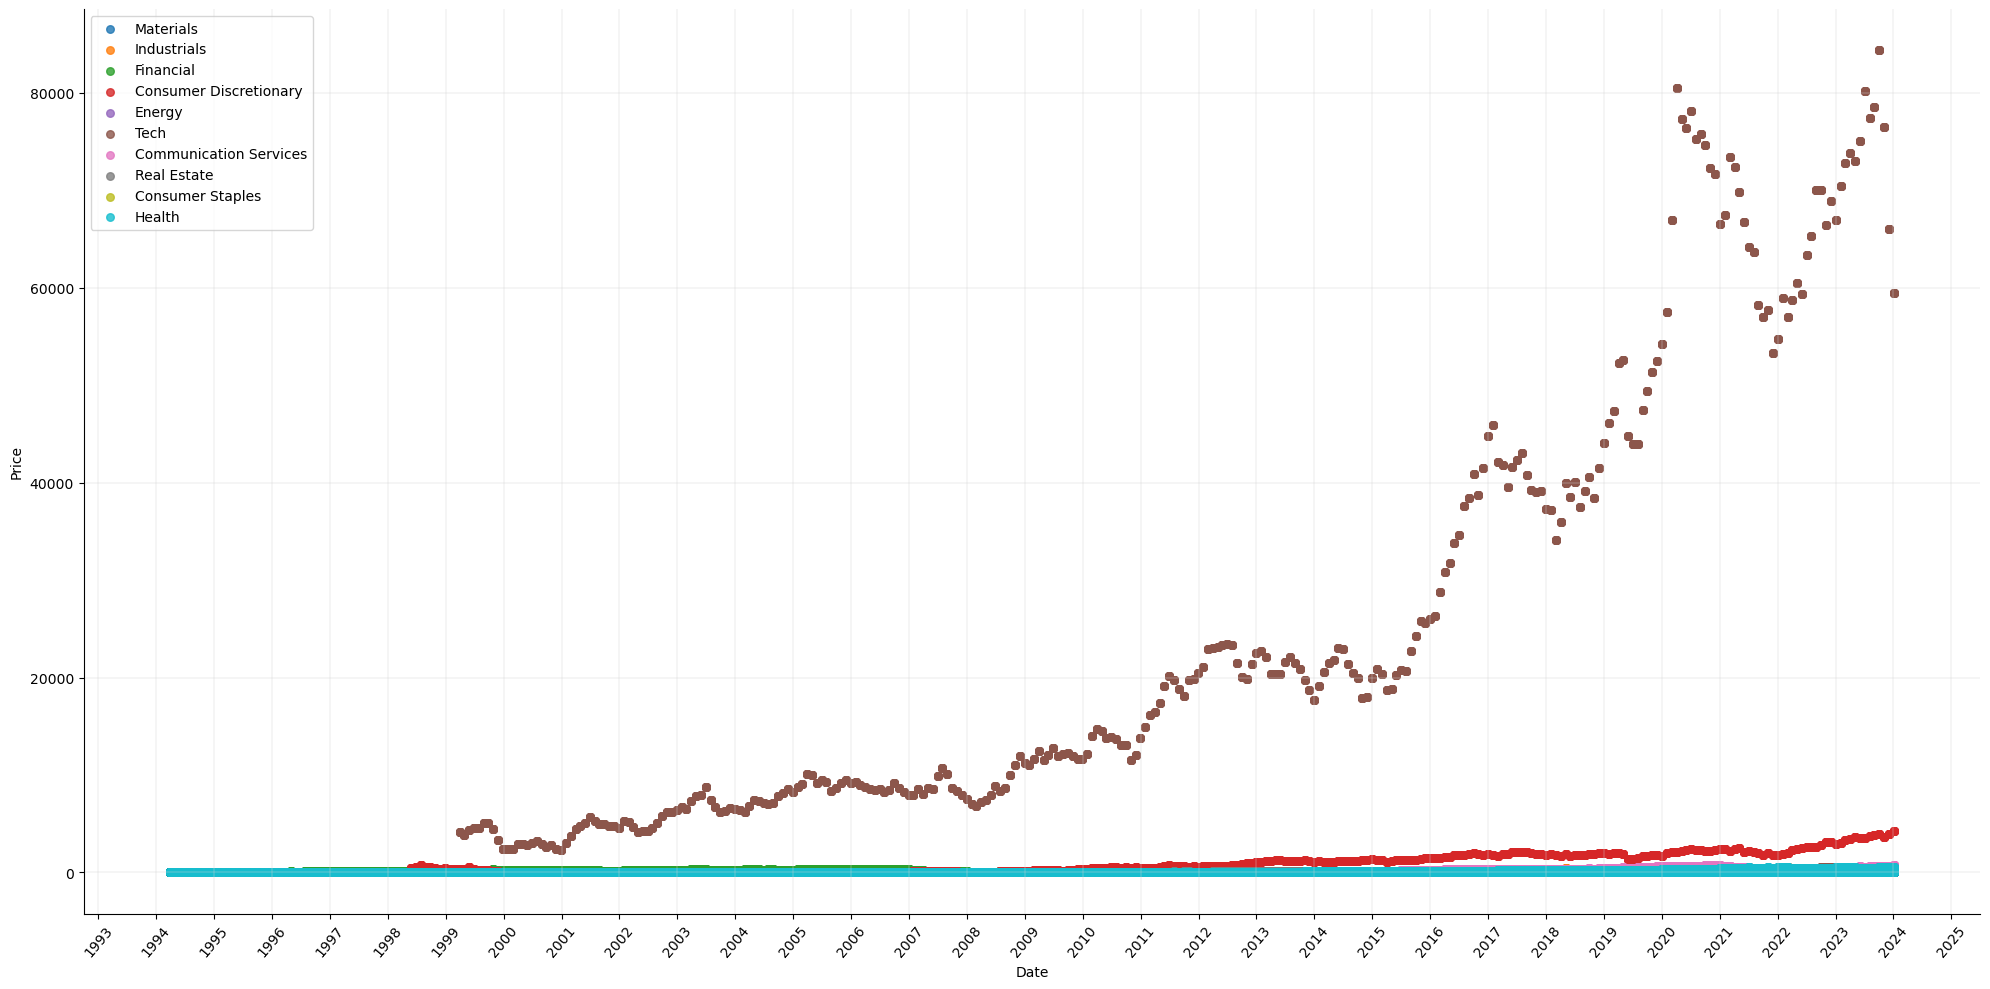

In [21]:
visualization = sns.lmplot(data=mega_df, x='formated_date', y='average',
                           height=10, aspect=2,
                           fit_reg=False, hue='industry',
                           legend=False, scatter_kws={'s':30})

# Format the x-axis to display dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365)) 

plt.xticks(rotation=50)
plt.tight_layout()
plt.legend(loc='upper left')

plt.xlabel('Date')
plt.ylabel('Price')

plt.grid(color='lightgray', linewidth=0.3)

#plt.savefig('./imgs/after_1995/0__all_companies_data_plot.png', format='jpg', dpi=300)

plt.show()

### Drop top 3 companies

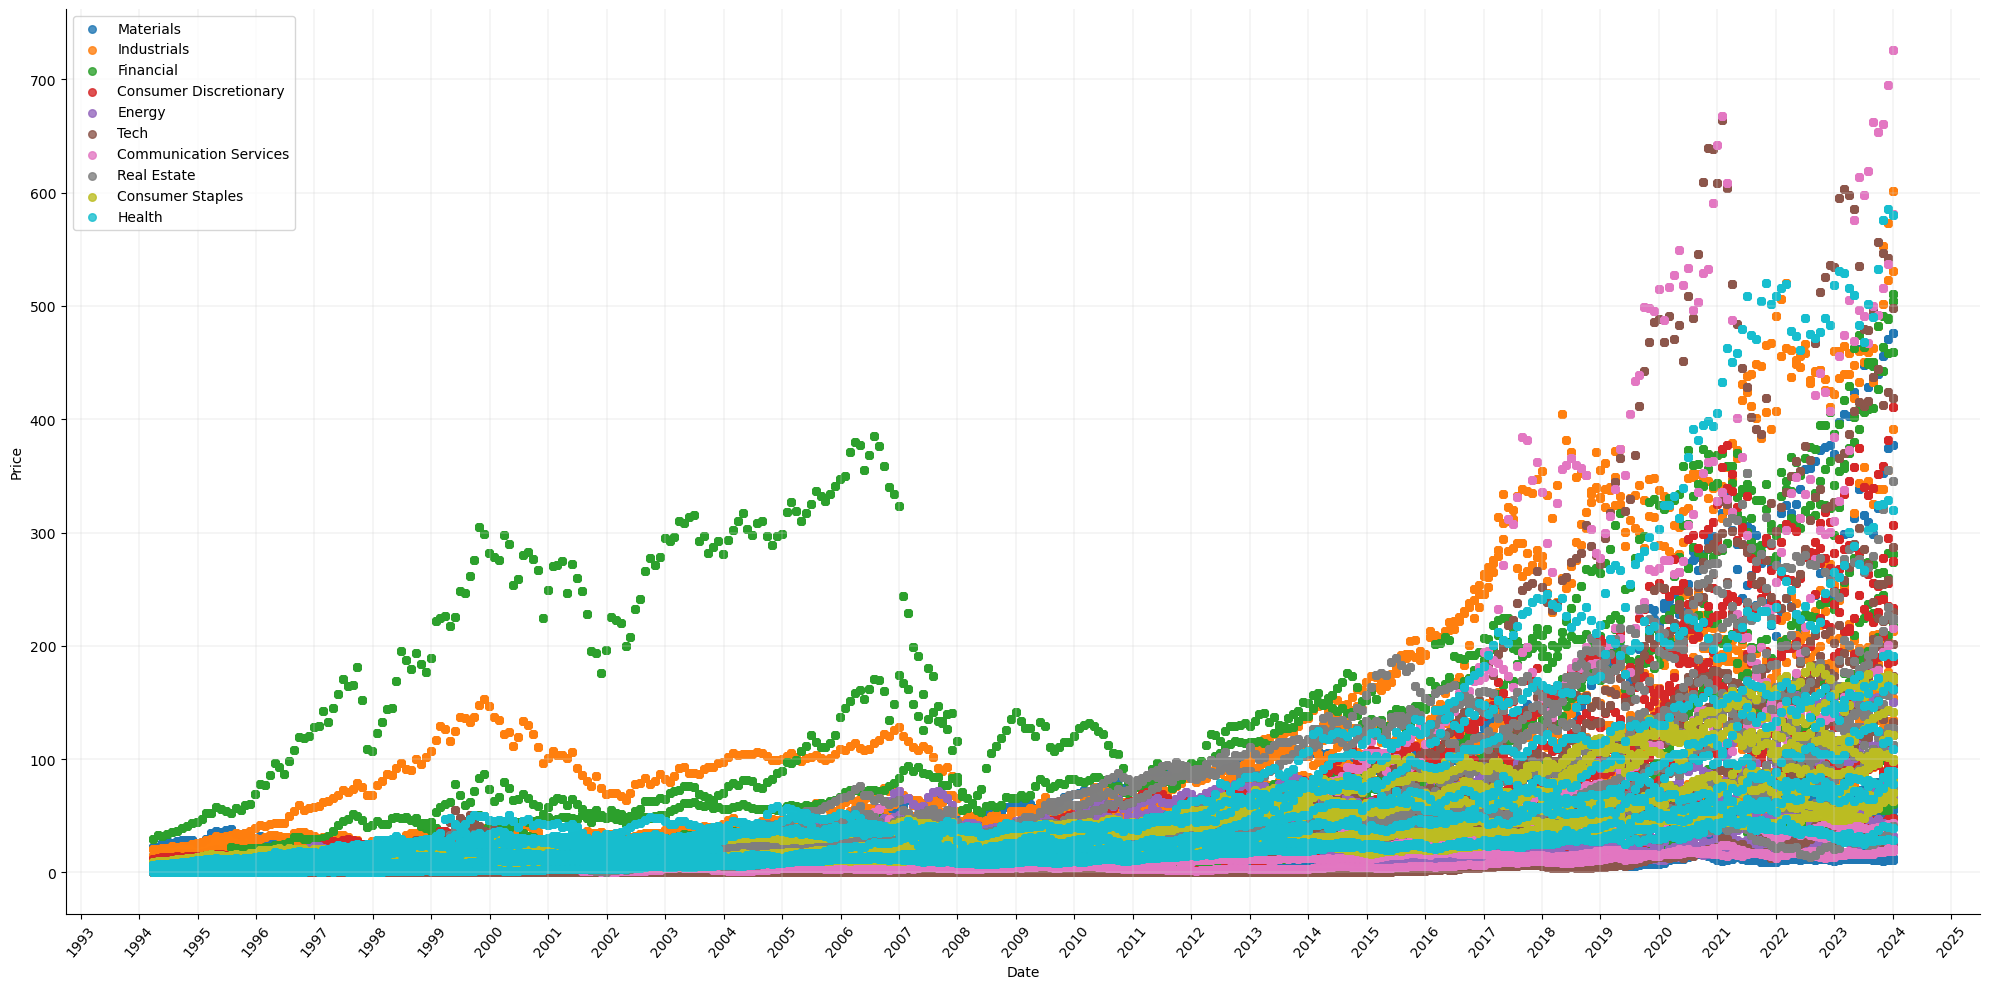

In [22]:
# drop Samsung Electronics Co Ltd
mega_df = mega_df.loc[ mega_df['ticker'] != "005930.KS" ]
# drop Booking Holdings Inc
mega_df = mega_df.loc[ mega_df['ticker'] != "BKNG" ]
# drop Charter Communications Inc
mega_df = mega_df.loc[ mega_df['ticker'] != "CHTR" ]



visualization = sns.lmplot(data=mega_df, x='formated_date', y='average',
                           height=10, aspect=2,
                           fit_reg=False, hue='industry',
                           legend=False, scatter_kws={'s':30})

# Format the x-axis to display dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))

plt.xticks(rotation=50)
plt.tight_layout()
plt.legend(loc='upper left')

plt.xlabel('Date')
plt.ylabel('Price')

plt.grid(color='lightgray', linewidth=0.3)

#plt.savefig('./imgs/after_1995/1__drop_top_3_companies_data_plot.png', format='jpg', dpi=300)

plt.show()

### Plot by industry

In [23]:
mean_mega_df = pd.read_csv('./company_data/combined_data/avg_by_date/mean_mega_df.csv')

mean_mega_df = mean_mega_df.loc[ mean_mega_df['date'] >= '1995-01' ]

# Convert the dates into a format matplotlib can read
mean_mega_df['formated_date'] = matplotlib.dates.datestr2num(mean_mega_df['date'])

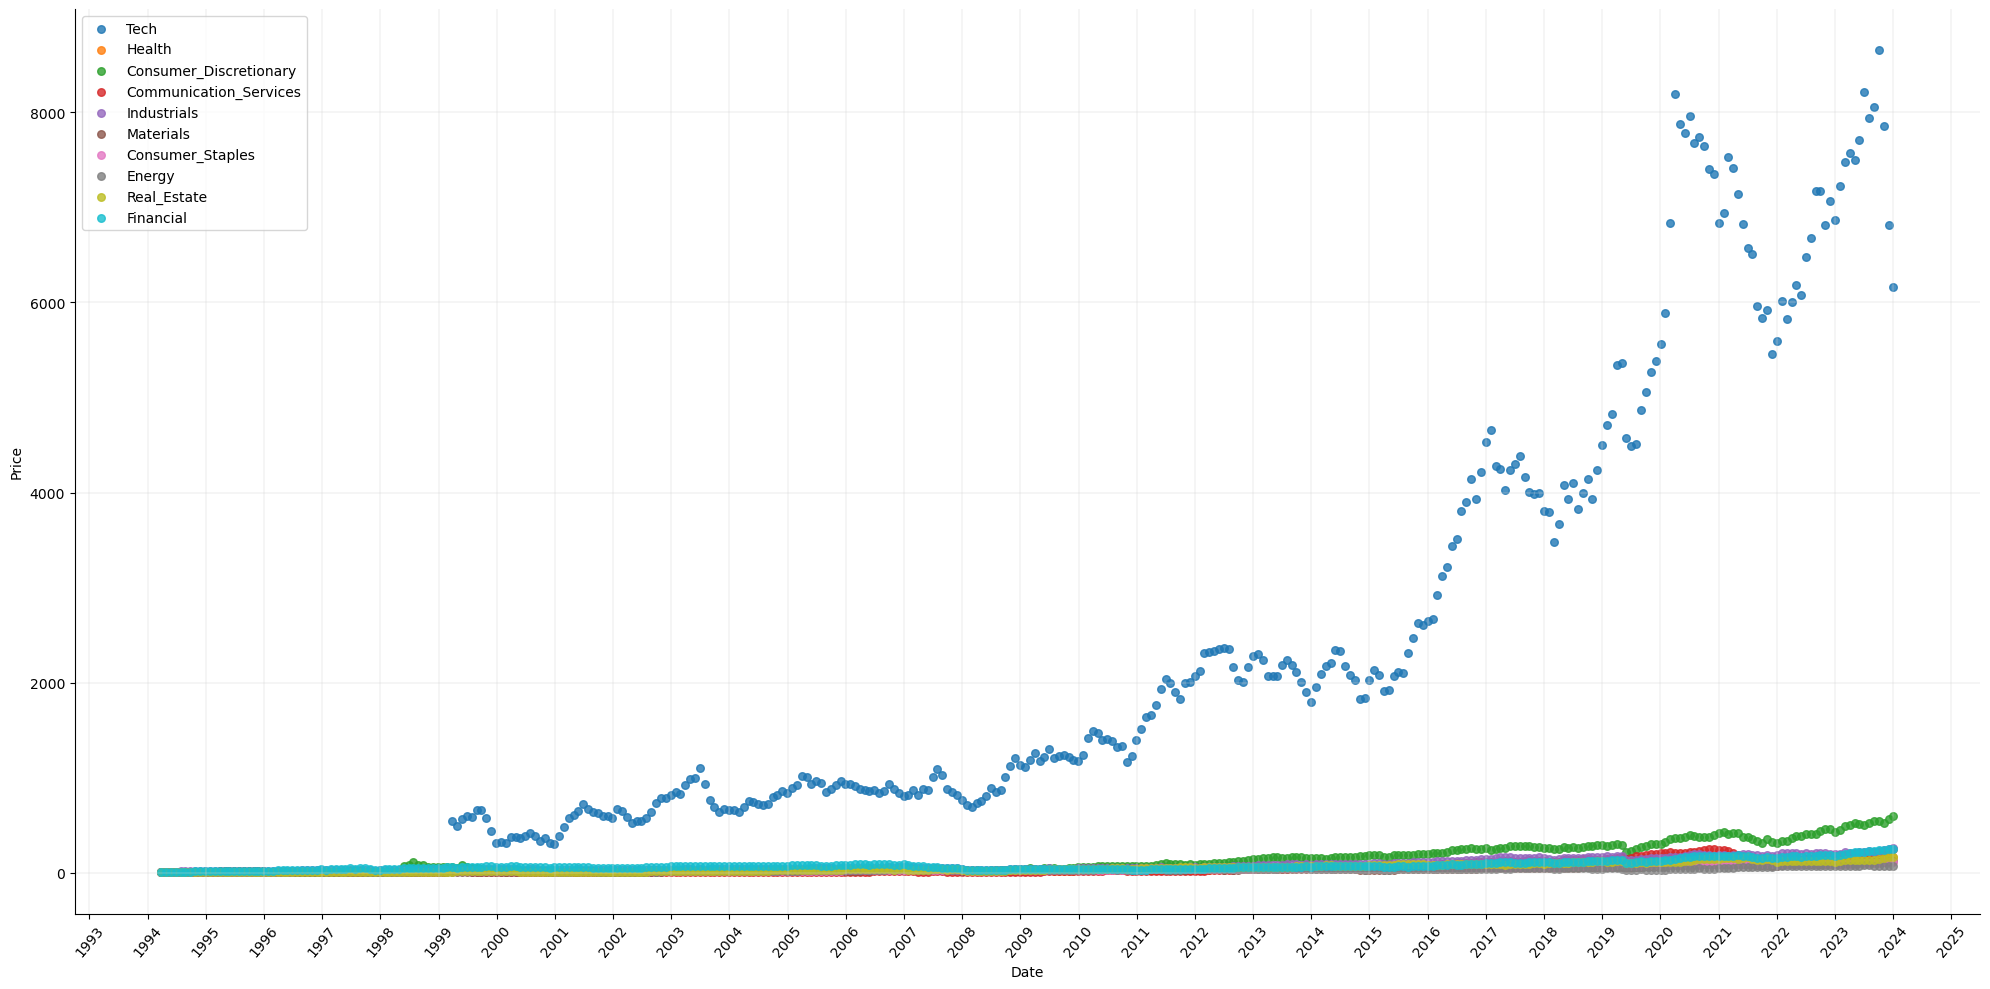

In [24]:
visualization = sns.lmplot(data=mean_mega_df, x='formated_date', y='average',
                           height=10, aspect=2,
                           fit_reg=False, hue='industry',
                           legend=False, scatter_kws={'s':30})

# Format the x-axis to display dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))

plt.xticks(rotation=50)
plt.tight_layout()
plt.legend(loc='upper left')

plt.xlabel('Date')
plt.ylabel('Price')

plt.grid(color='lightgray', linewidth=0.3)

#plt.savefig('./imgs/after_1995/2__mean_mega_df_plot.png', format='jpg', dpi=300)

plt.show()

### Dropping tech

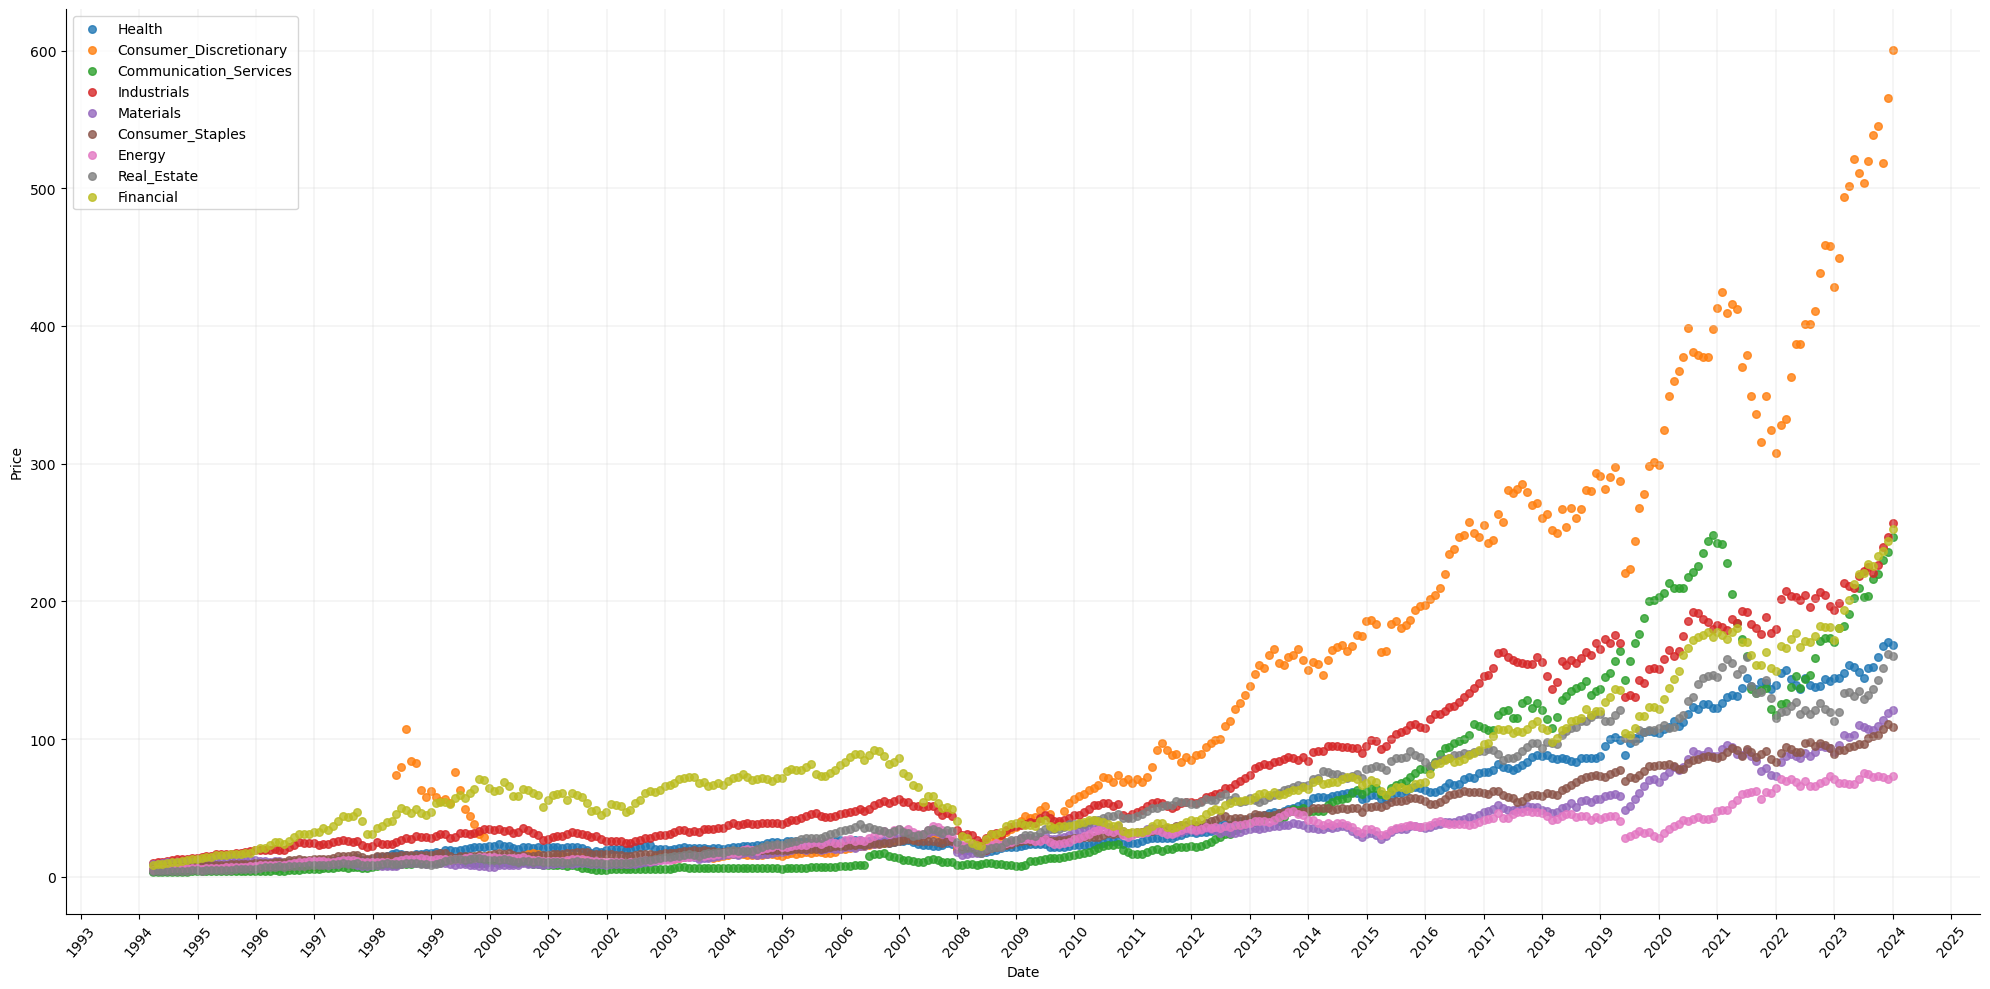

In [25]:
mean_mega_df = mean_mega_df.loc[ mean_mega_df['industry'] != 'Tech' ]


visualization = sns.lmplot(data=mean_mega_df, x='formated_date', y='average',
                           height=10, aspect=2,
                           fit_reg=False, hue='industry',
                           legend=False, scatter_kws={'s':30})

# Format the x-axis to display dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))

plt.xticks(rotation=50)
plt.tight_layout()
plt.legend(loc='upper left')

plt.xlabel('Date')
plt.ylabel('Price')

plt.grid(color='lightgray', linewidth=0.3)

#plt.savefig('./imgs/after_1995/3__mean_mega_df_tech_removed_plot.png', format='jpg', dpi=300)

plt.show()

---

# Using line plots instead of linear model plot

In [26]:
mega_df = pd.read_csv('./company_data/combined_data/mega_df.csv')


mega_df['ticker'] = mega_df['ticker'].astype('category')
mega_df['industry'] = mega_df['industry'].astype('category')


mega_df = mega_df.loc[ mega_df['date'] >= '1995-01' ]

# Convert the dates into a format matplotlib can read
mega_df['formated_date'] = matplotlib.dates.datestr2num(mega_df['date'])

### All companie data

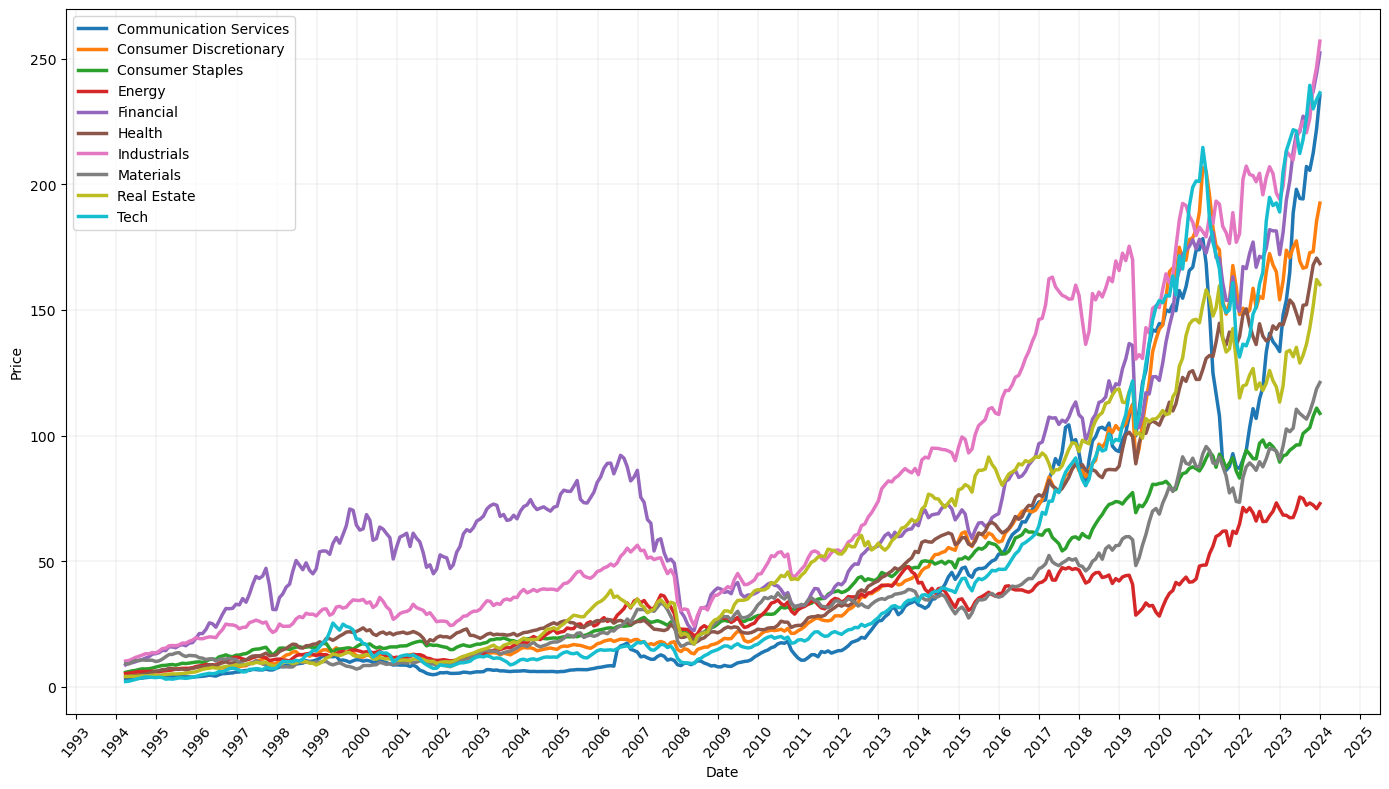

In [33]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=mega_df, x='formated_date', y='average',
                           hue='industry', linewidth=2.5, errorbar=None)



# Format the x-axis to display dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365)) 

plt.xticks(rotation=50)
plt.tight_layout()
plt.legend(loc='upper left')

plt.xlabel('Date')
plt.ylabel('Price')

plt.grid(color='lightgray', linewidth=0.3)

plt.savefig('./imgs/line_plots/0__samsung_and_booking_removed_companies_data_plot.png', format='jpg', dpi=300)

plt.show()

### drop Samsung Electronics Co Ltd, Booking Holdings Inc, and Charter Communications Inc

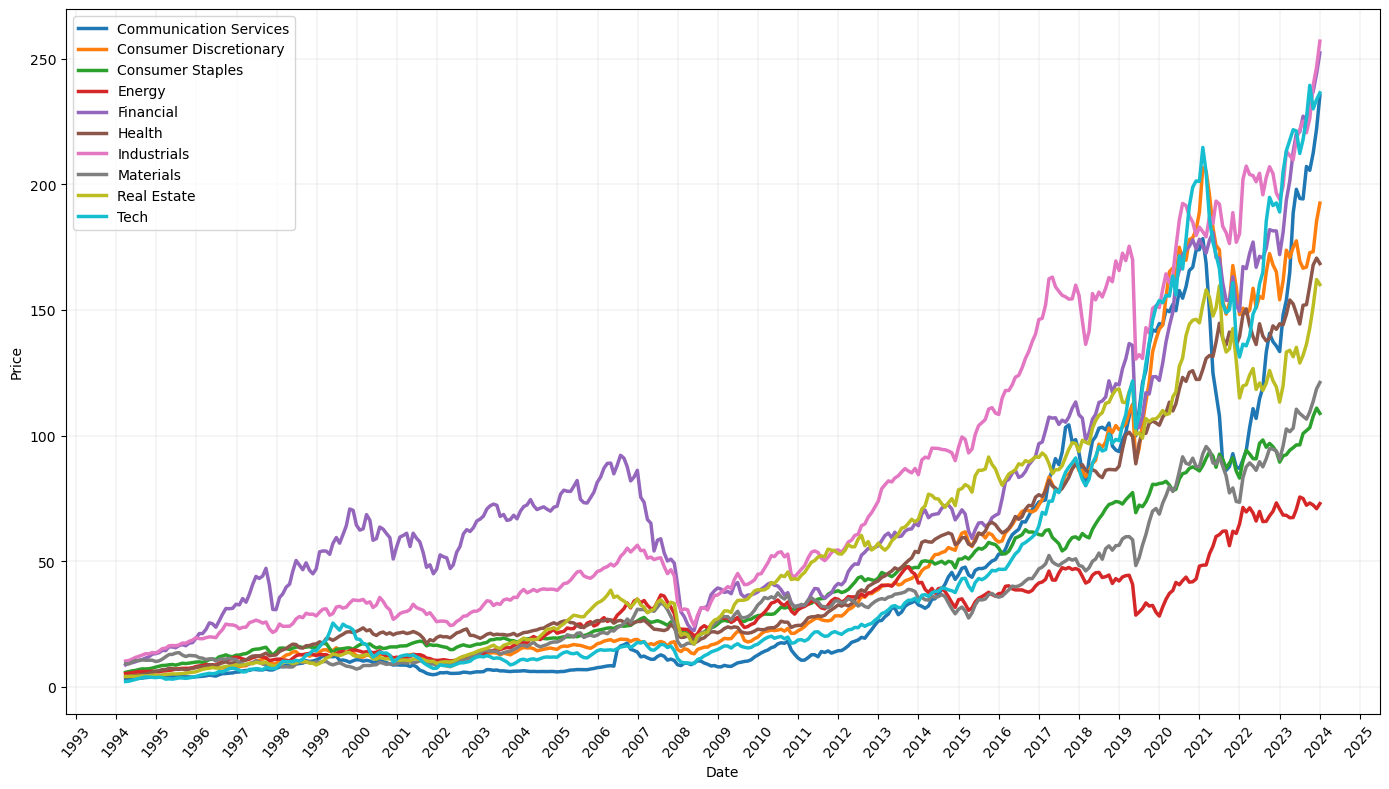

In [28]:
mega_df = mega_df.loc[ ~mega_df['ticker'].isin(["005930.KS", "BKNG", "CHTR"]) ]


plt.figure(figsize=(14, 8))

sns.lineplot(data=mega_df, x='formated_date', y='average',
                           hue='industry', linewidth=2.5, errorbar=None)


# Format the x-axis to display dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365)) 

plt.xticks(rotation=50)
plt.tight_layout()
plt.legend(loc='upper left')

plt.xlabel('Date')
plt.ylabel('Price')

plt.grid(color='lightgray', linewidth=0.3)

#plt.savefig('./imgs/line_plots/1__companies_data_top_3_removed_plot.png', format='jpg', dpi=300)

plt.show()

### Ploting by industry

In [29]:
mean_mega_df = pd.read_csv('./company_data/combined_data/avg_by_date/mean_mega_df.csv')

mean_mega_df = mean_mega_df.loc[ mean_mega_df['date'] >= '1995-01' ]

# Convert the dates into a format matplotlib can read
mean_mega_df['formated_date'] = matplotlib.dates.datestr2num(mean_mega_df['date'])

#### all industries

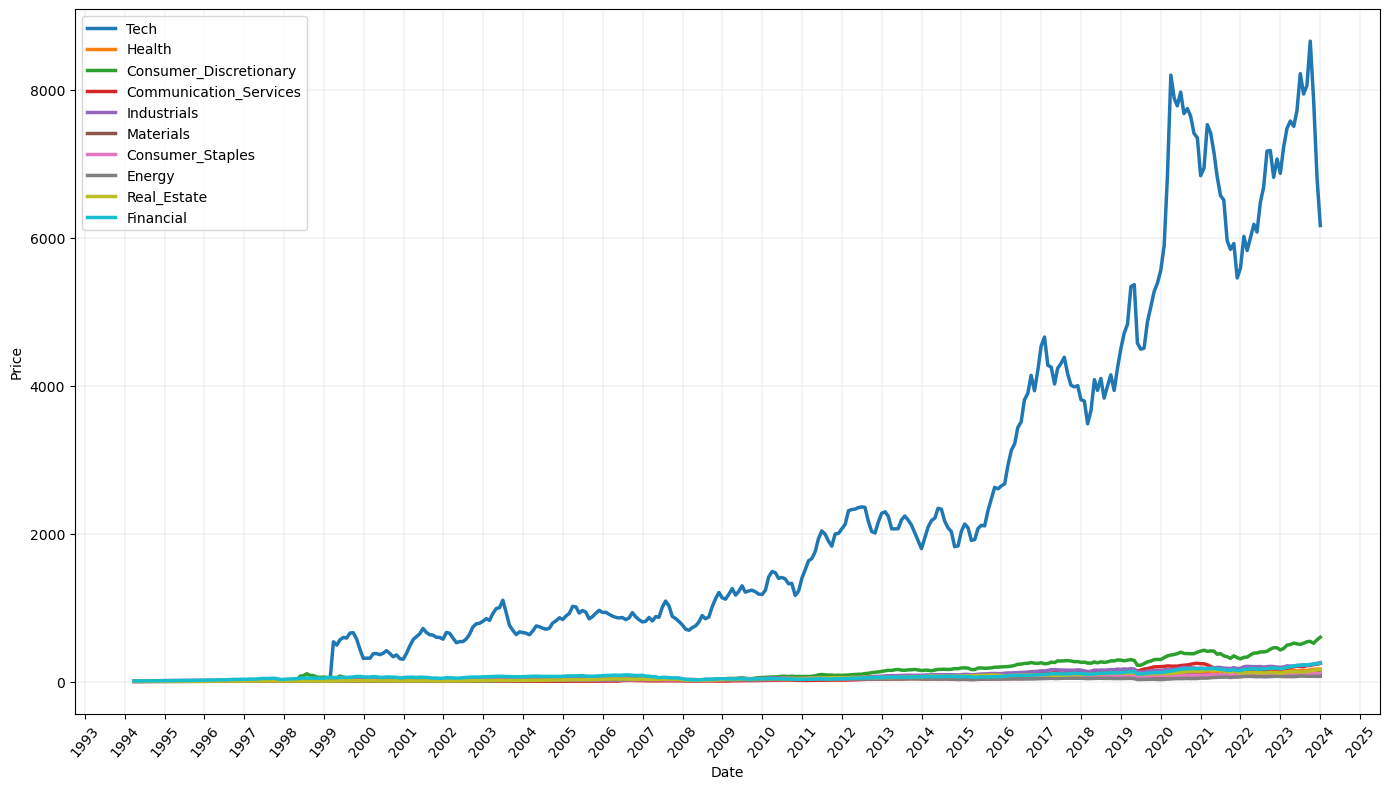

In [30]:
plt.figure(figsize=(14, 8))



sns.lineplot(data=mean_mega_df, x='formated_date', y='average',
                           hue='industry', linewidth=2.5, errorbar=None)


# Format the x-axis to display dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))

plt.xticks(rotation=50)
plt.tight_layout()
plt.legend(loc='upper left')

plt.xlabel('Date')
plt.ylabel('Price')

plt.grid(color='lightgray', linewidth=0.3)

#plt.savefig('./imgs/line_plots/2__all_industry_plot.png', format='jpg', dpi=300)

plt.show()

#### Dropping tech

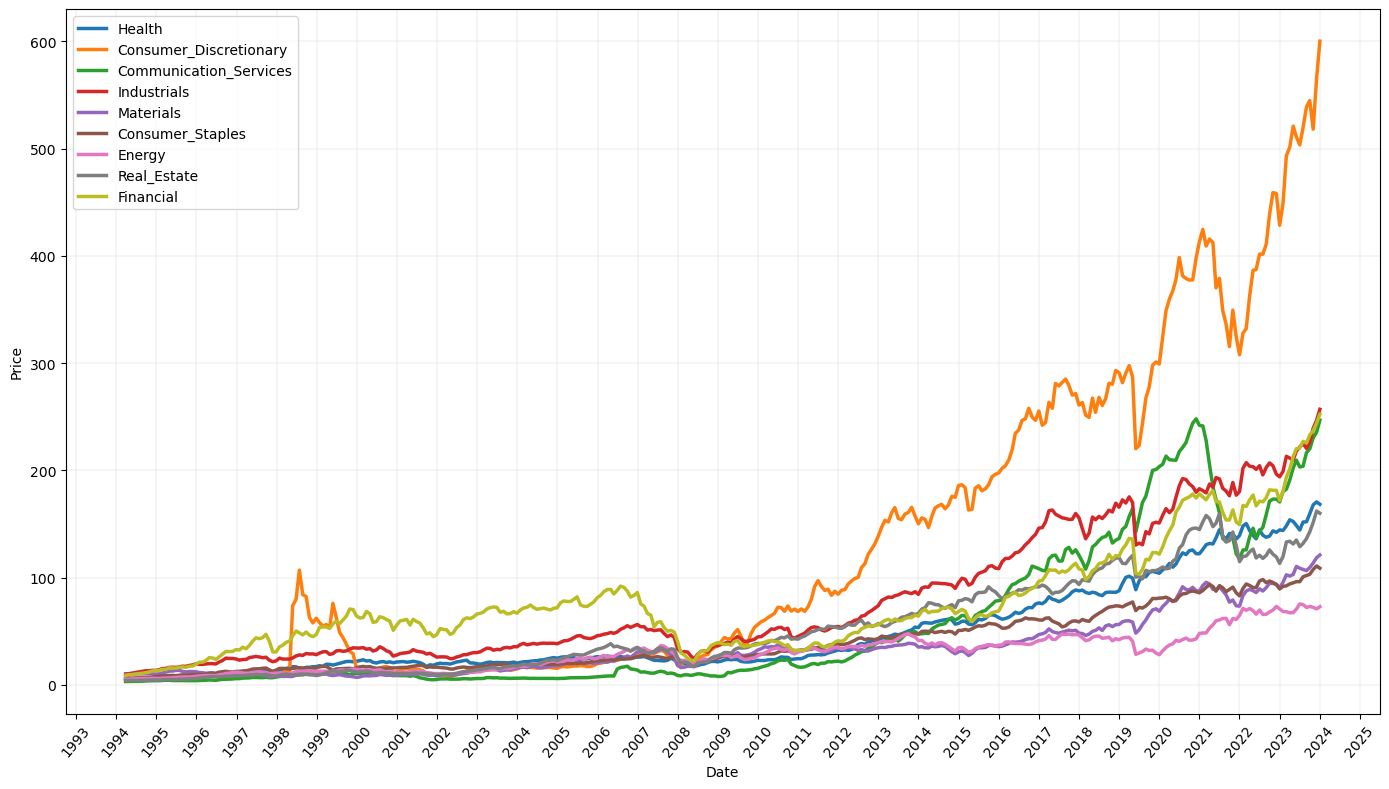

In [31]:
mean_mega_df = mean_mega_df.loc[ mean_mega_df['industry'] != 'Tech' ]


plt.figure(figsize=(14, 8))



sns.lineplot(data=mean_mega_df, x='formated_date', y='average',
                           hue='industry', linewidth=2.5, errorbar=None)


# Format the x-axis to display dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))

plt.xticks(rotation=50)
plt.tight_layout()
plt.legend(loc='upper left')

plt.xlabel('Date')
plt.ylabel('Price')

plt.grid(color='lightgray', linewidth=0.3)

#plt.savefig('./imgs/line_plots/3__tech_industry_removed_plot.png', format='jpg', dpi=300)

plt.show()